### Importing Required Libraries

In [ ]:
import os
import shutil
import pandas as pd
import numpy as np
from collections import defaultdict
from unidecode import unidecode
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

### Initial Class Distribution in Raw Dataset


Total images: 4637

Class-wise counts:
- Data: 0
- Akhenaten: 231
- AmenhotepIII: 159
- Bent pyramid for senefru: 336
- Colossoi of Memnon: 268
- Goddess Isis: 249
- Hatshepsut face: 129
- Khafre Pyramid: 444
- King Thutmose III: 192
- Mask of Tutankhamun: 207
- menkaure pyramid: 120
- Nefertiti: 202
- Pyramid_of_Djoser: 164
- Ramesses II: 266
- Ramessum: 189
- sphinx: 345
- Statue of King Zoser: 123
- Statue of Tutankhamun with Ankhesenamun: 96
- Temple_of_Hatshepsut: 349
- Temple_of_Isis_in_Philae: 163
- Temple_of_Kom_Ombo: 186
- The Great Temple of Ramesses II: 219


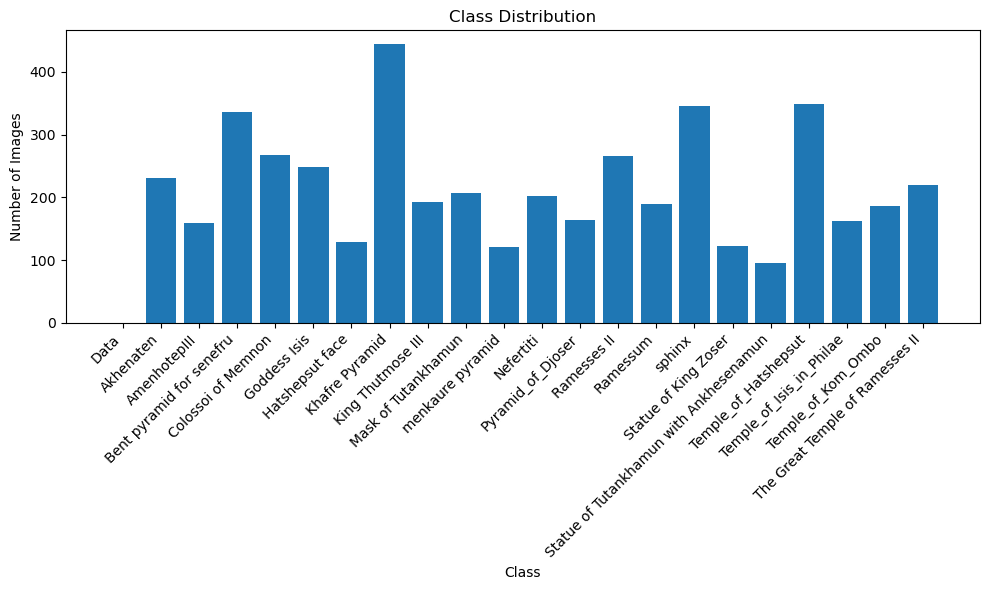

In [ ]:
dataset_path = "DataSets/Data"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

counts = defaultdict(int)
total = 0


for root, dirs, files in os.walk(dataset_path):
    class_name = os.path.basename(root)
    img_count = 0
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            img_count += 1
    counts[class_name] = img_count
    total += img_count

print(f"\nTotal images: {total}")
print("\nClass-wise counts:")
for class_name, count in counts.items():
    print(f"- {class_name}: {count}")

 
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()


### Watermark Removal by Cropping Bottom Pixels

In [ ]:
input_folder = 'DataSets/alamy'
output_folder = 'alamywatermark'

def crop_watermark(input_folder, output_folder, crop_height=50, test_first=True):
    os.makedirs(output_folder, exist_ok=True)
    
    images = []
    for root, _, files in os.walk(input_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp')):
                images.append((root, file))
    
    if not images:
        print("⚠️ لا توجد صور في المجلد المحدد")
        return
    
    if test_first:
        root, file = images[0]
        test_path = os.path.join(root, file)
        test_img = cv2.imread(test_path)
        
        if test_img is None:
            print(f"⚠️ تعذر قراءة صورة الاختبار: {test_path}")
            return
        
        test_output_folder = os.path.join(output_folder, "TEST_PREVIEW")
        os.makedirs(test_output_folder, exist_ok=True)
        test_output_path = os.path.join(test_output_folder, file)
        
        cropped = test_img[:-crop_height, :] if crop_height > 0 else test_img.copy()
        cv2.imwrite(test_output_path, cropped)
        
        print(f"✳️ تم حفظ صورة الاختبار في: {test_output_path}")
        confirm = input("هل تريد المتابعة بعد فحص الصورة؟ (y/n) ").strip().lower()
        if confirm != 'y':
            print("❌ توقف عن التنفيذ بناء على طلب المستخدم")
            return
    
    processed = 0
    for root, file in images:
        img_path = os.path.join(root, file)
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ تعذر قراءة الصورة: {img_path}")
            continue
        
        relative_path = os.path.relpath(root, input_folder)
        dest_folder = os.path.join(output_folder, relative_path)
        os.makedirs(dest_folder, exist_ok=True)
        
        cropped_img = img[:-crop_height, :] if crop_height > 0 else img
        output_path = os.path.join(dest_folder, file)
        cv2.imwrite(output_path, cropped_img)
        processed += 1
    
    print(f"✅ تمت معالجة {processed} صورة بنجاح!")

crop_watermark(input_folder, output_folder, 50, True)

✳️ تم حفظ صورة الاختبار في: alamywatermark\TEST_PREVIEW\2a25jxa.jpg
✅ تمت معالجة 881 صورة بنجاح!


### Statistical Summary of Image Count per Class

In [13]:
data_dir = "DataSets/Data"
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir)}
print(pd.Series(class_counts).describe())

count     21.000000
mean     220.857143
std       88.861851
min       96.000000
25%      163.000000
50%      202.000000
75%      266.000000
max      444.000000
dtype: float64


### Rename Images in Folder to Sequential Numbers

In [ ]:

def rename_images_to_numbers(root_folder):
    for root, dirs, files in os.walk(root_folder):
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.webp'))]
        image_files.sort()  
        
        counter = 1  
        
        for filename in image_files:
            ext = os.path.splitext(filename)[1].lower()
            new_name = f"{counter:03d}{ext}"  
            new_path = os.path.join(root, new_name)
            old_path = os.path.join(root, filename)
            
           
            duplicate_count = 1
            while os.path.exists(new_path):
                new_name = f"{counter:03d}_{duplicate_count}{ext}"
                new_path = os.path.join(root, new_name)
                duplicate_count += 1
            
            shutil.move(old_path, new_path)
            print(f"تم تغيير: {filename} -> {new_name}")
            counter += 1  
data_folders = [
    'DataSets/Data'
]

for folder in data_folders:
    rename_images_to_numbers(folder)
    print(f"تم الانتهاء من معالجة مجلد: {folder}")

print("اكتملت عملية إعادة التسمية بنجاح!")

تم تغيير: 001_.jpg -> 001.jpg
تم تغيير: 003_.jpg -> 002.jpg
تم تغيير: 005_.jpg -> 003.jpg
تم تغيير: 007_.jpg -> 004.jpg
تم تغيير: 009_.jpg -> 005.jpg
تم تغيير: 011_.jpg -> 006.jpg
تم تغيير: 013_.jpg -> 007.jpg
تم تغيير: 015_.jpg -> 008.jpg
تم تغيير: 017_.jpg -> 009.jpg
تم تغيير: 019_.jpg -> 010.jpg
تم تغيير: 021_.jpg -> 011.jpg
تم تغيير: 023_.jpg -> 012.jpg
تم تغيير: 025_.jpg -> 013.jpg
تم تغيير: 027_.jpg -> 014.jpg
تم تغيير: 029_.jpg -> 015.jpg
تم تغيير: 031_.jpg -> 016.jpg
تم تغيير: 033_.jpg -> 017.jpg
تم تغيير: 035_.jpg -> 018.jpg
تم تغيير: 037_.jpg -> 019.jpg
تم تغيير: 039_.jpg -> 020.jpg
تم تغيير: 041_.jpg -> 021.jpg
تم تغيير: 043_.jpg -> 022.jpg
تم تغيير: 045_.jpg -> 023.jpg
تم تغيير: 047_.jpg -> 024.jpg
تم تغيير: 049_.jpg -> 025.jpg
تم تغيير: 051_.jpg -> 026.jpg
تم تغيير: 053_.jpg -> 027.jpg
تم تغيير: 055_.jpg -> 028.jpg
تم تغيير: 057_.jpg -> 029.jpg
تم تغيير: 059_.jpg -> 030.jpg
تم تغيير: 061_.jpg -> 031.jpg
تم تغيير: 063_.jpg -> 032.jpg
تم تغيير: 065_.jpg -> 033.jpg
تم تغيير: 

### Verify and Remove Unsupported Image Files

In [ ]:

def verify_and_clean_images(root_folder):
    allowed_extensions = {'.jpeg', '.jpg', '.bmp', '.png'}
    invalid_files = []
    
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            file_path = os.path.join(root, file)
            ext = os.path.splitext(file)[1].lower()
            
            if ext not in allowed_extensions:
                invalid_files.append(file_path)
    
    if not invalid_files:
        print("✓ جميع الملفات بصيغ مدعومة")
        return
    
    print("الملفات غير المدعومة:")
    for i, f in enumerate(invalid_files, 1):
        print(f"{i}. {f}")
    
    confirm = input("\nهل تريد حذف هذه الملفات؟ (y/n) ").lower()
    if confirm == 'y':
        for f in invalid_files:
            try:
                os.remove(f)
                print(f"تم حذف: {f}")
            except Exception as e:
                print(f"خطأ في حذف {f}: {str(e)}")
        print(f"\nتم حذف {len(invalid_files)} ملف")
    else:
        print("تم الإلغاء بدون حذف")

verify_and_clean_images('DataSets/Data')

الملفات غير المدعومة:
1. DataSets/Data\Bent pyramid for senefru\282.webp
2. DataSets/Data\Colossoi of Memnon\egypt-luxor-colossi-of-memnon.avif
3. DataSets/Data\Statue of King Zoser\014.gif
تم حذف: DataSets/Data\Bent pyramid for senefru\282.webp
تم حذف: DataSets/Data\Colossoi of Memnon\egypt-luxor-colossi-of-memnon.avif
تم حذف: DataSets/Data\Statue of King Zoser\014.gif

تم حذف 3 ملف


### Analyze Dataset for Grayscale, Color, and Corrupted Images

In [ ]:

def analyze_dataset(dataset_path):
    results = {
        'true_grayscale': [],    
        'pseudo_grayscale': [],  
        'color_images': [],      
        'corrupted': [],         
        'other_modes': {}      
    }

    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            
            try:
                with Image.open(file_path) as pil_img:
                    mode = pil_img.mode
                    
                    if mode in ['L', 'LA']:
                        results['true_grayscale'].append(file_path)
                        continue
                        
                    if mode in ['RGB', 'RGBA']:
                        cv_img = cv2.imread(file_path)
                        if cv_img is None:
                            results['corrupted'].append(file_path)
                            continue
                            
                        cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
                        
                        r, g, b = cv_img[:,:,0], cv_img[:,:,1], cv_img[:,:,2]
                        if np.array_equal(r, g) and np.array_equal(g, b):
                            results['pseudo_grayscale'].append(file_path)
                        else:
                            results['color_images'].append(file_path)
                            
                    else:
                        if mode not in results['other_modes']:
                            results['other_modes'][mode] = []
                        results['other_modes'][mode].append(file_path)
                        
            except Exception as e:
                results['corrupted'].append(f"{file_path} - Error: {str(e)}")

    print("\n" + "="*40 + " التقرير النهائي " + "="*40)
    print(f"• Grayscale الحقيقي (قناة واحدة): {len(results['true_grayscale'])} صورة")
    print(f"• Grayscale زائف (RGB متطابق): {len(results['pseudo_grayscale'])} صورة")
    print(f"• صور ملونة: {len(results['color_images'])} صورة")
    print(f"• ملفات تالفة: {len(results['corrupted'])}")
    print(f"• أنماط أخرى: { {k: len(v) for k, v in results['other_modes'].items()} }")
    
    if input("\nهل تريد عرض أمثلة؟ (y/n) ").lower() == 'y':
        print("\nأمثلة Grayscale الحقيقي:")
        for f in results['true_grayscale'][:3]: print(f" - {f}")
        
        print("\nأمثلة Grayscale الزائف:")
        for f in results['pseudo_grayscale'][:3]: print(f" - {f}")
        
        print("\nأمثلة صور ملونة:")
        for f in results['color_images'][:3]: print(f" - {f}")

    if input("\nهل تريد حذف الصور Grayscale؟ (y/n) ").lower() == 'y':
        delete_files = results['true_grayscale'] + results['pseudo_grayscale']
        for f in delete_files:
            try:
                os.remove(f)
                print(f"تم حذف: {f}")
            except:
                print(f"فشل حذف: {f}")
        print(f"تم حذف {len(delete_files)} صورة")

analyze_dataset('DataSets/Data')


======================================== التقرير النهائي ========================================
• Grayscale الحقيقي (قناة واحدة): 16 صورة
• Grayscale زائف (RGB متطابق): 52 صورة
• صور ملونة: 4563 صورة
• ملفات تالفة: 0
• أنماط أخرى: {'P': 3}
تم حذف: DataSets/Data\Akhenaten\100.jpg
تم حذف: DataSets/Data\Akhenaten\231.jpg
تم حذف: DataSets/Data\AmenhotepIII\129.jpg
تم حذف: DataSets/Data\AmenhotepIII\130.jpg
تم حذف: DataSets/Data\AmenhotepIII\132.jpg
تم حذف: DataSets/Data\AmenhotepIII\135.jpg
تم حذف: DataSets/Data\AmenhotepIII\154.jpg
تم حذف: DataSets/Data\Colossoi of Memnon\257.jpg
تم حذف: DataSets/Data\Colossoi of Memnon\258.jpg
تم حذف: DataSets/Data\Colossoi of Memnon\266.jpg
تم حذف: DataSets/Data\King Thutmose III\160.jpg
تم حذف: DataSets/Data\King Thutmose III\167.jpg
تم حذف: DataSets/Data\Nefertiti\051.jpg
تم حذف: DataSets/Data\Ramesses II\264.jpg
تم حذف: DataSets/Data\Ramessum\068.jpg
تم حذف: DataSets/Data\sphinx\194.jpg
تم حذف: DataSets/Data\Akhenaten\003.jpg
تم حذف: DataSets/Data

### Visualize Image Count per Class in Dataset


Total images: 4553

Class-wise counts:
- Data: 0
- Akhenaten: 215
- AmenhotepIII: 146
- Bent pyramid for senefru: 335
- Colossoi of Memnon: 264
- Goddess Isis: 245
- Hatshepsut face: 126
- Khafre Pyramid: 443
- King Thutmose III: 182
- Mask of Tutankhamun: 206
- menkaure pyramid: 120
- Nefertiti: 196
- Pyramid_of_Djoser: 161
- Ramesses II: 263
- Ramessum: 188
- sphinx: 341
- Statue of King Zoser: 114
- Statue of Tutankhamun with Ankhesenamun: 96
- Temple_of_Hatshepsut: 349
- Temple_of_Isis_in_Philae: 163
- Temple_of_Kom_Ombo: 182
- The Great Temple of Ramesses II: 218


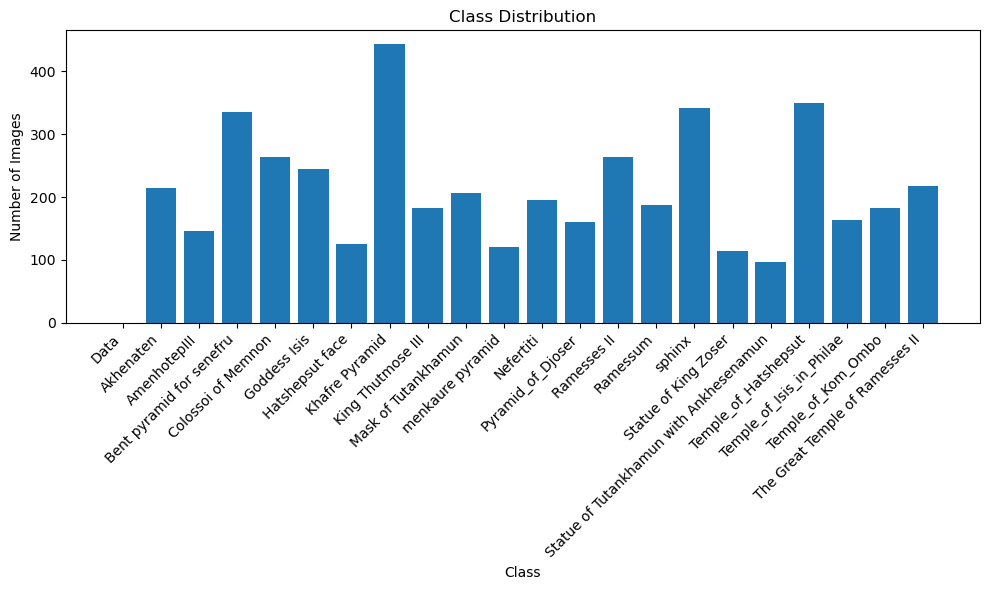

In [ ]:
dataset_path = "DataSets/Data"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

counts = defaultdict(int)
total = 0

for root, dirs, files in os.walk(dataset_path):
    class_name = os.path.basename(root)
    img_count = 0
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            img_count += 1
    counts[class_name] = img_count
    total += img_count

print(f"\nTotal images: {total}")
print("\nClass-wise counts:")
for class_name, count in counts.items():
    print(f"- {class_name}: {count}")

 
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()
